# Florence-2-large sample usage

In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
import torch
%matplotlib inline
from torch import nn
import time
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import os

In [2]:
!pip install seaborn ncps torch pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.5/890.5 kB 41.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import torch.nn as nn
import ncps
from ncps import wirings
from ncps.wirings import AutoNCP
from ncps.torch import LTC
import pytorch_lightning as pl
import torch
import torch.utils.data as data

In [4]:
!pip install flash_attn timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash_attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187309225 sha256=237ef9c6157db394e1ddde4ba609a21ebb98382377a27041edc09318801a6f24
  Stored in directory: /root/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash_attn


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [ ]:
#!rm -rf Florence-2-base

In [54]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cpu')

In [5]:
prompt= "Fly towards tree"
task = "<OD>"
text = "<DETAILED_CAPTION>"

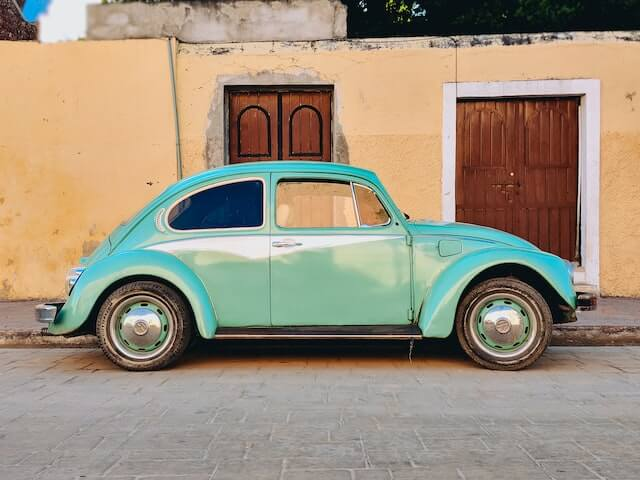

In [6]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
!git clone https://huggingface.co/microsoft/Florence-2-base

Cloning into 'Florence-2-base'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 46 (delta 17), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (46/46), 931.28 KiB | 150.00 KiB/s, done.


In [ ]:
model_id = '/content/Florence-2-base'

In [ ]:
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').to(DEVICE)

Some weights of the model checkpoint at /content/Florence-2-base were not used when initializing Florence2ForConditionalGeneration: ['language_model.final_logits_bias', 'language_model.lm_head.weight', 'language_model.model.decoder.embed_positions.weight', 'language_model.model.decoder.embed_tokens.weight', 'language_model.model.decoder.layernorm_embedding.bias', 'language_model.model.decoder.layernorm_embedding.weight', 'language_model.model.decoder.layers.0.encoder_attn.k_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.k_proj.weight', 'language_model.model.decoder.layers.0.encoder_attn.out_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.out_proj.weight', 'language_model.model.decoder.layers.0.encoder_attn.q_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.q_proj.weight', 'language_model.model.decoder.layers.0.encoder_attn.v_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.v_proj.weight', 'language_model.model.decoder.layer

# **Encoder Testing**

In [ ]:
start = time.time()
inputs_text = processor.text(text=prompt, return_tensors="pt", padding=True).to(DEVICE, torch.float16)
end = time.time()
print(f"Time taken: {end - start} seconds")
for key in inputs_text.keys():
    print(f"{key}: {inputs_text[key].shape}")

Time taken: 0.001983165740966797 seconds
input_ids: torch.Size([1, 100])
attention_mask: torch.Size([1, 100])


In [ ]:
start = time.time()
inputs_image = processor.image(images=image, return_tensors="pt").to(DEVICE, torch.float16)
end = time.time()
print(f"Time taken: {end - start} seconds")
for key in inputs_image.keys():
    print(f"{key}: {inputs_image[key].shape}")

Time taken: 0.030140161514282227 seconds
pixel_values: torch.Size([1, 3, 768, 768])


In [ ]:
print("Text shape")
inputs_text["input_ids"].shape

Text shape


torch.Size([1, 100])

In [ ]:
print("Attention shape")
inputs_text["attention_mask"].shape

Attention shape


torch.Size([1, 100])

In [ ]:
print("Image shape")
inputs_image["pixel_values"].shape

Image shape


torch.Size([1, 3, 768, 768])

In [ ]:
start = time.time()
inputs = processor(text=prompt, images=image, return_tensors="pt", padding=True).to(DEVICE, torch.float16)
end = time.time()
print(f"Time taken: {end - start} seconds")
for key in inputs.keys():
    print(f"{key}: {inputs[key].shape}")

Time taken: 0.07509207725524902 seconds
input_ids: torch.Size([1, 100])
attention_mask: torch.Size([1, 100])
pixel_values: torch.Size([1, 3, 768, 768])


In [ ]:
inputs["attention_mask"]

tensor([[1, 1, 1, 1, 1]])

# **Original Processor**

In [ ]:
print("Original Processor")
start = time.time()
with torch.no_grad():
  generated_ids = model(
    input_ids=inputs_text["input_ids"],
    pixel_values=inputs_image["pixel_values"],
    attention_mask=inputs_text["attention_mask"]
  )
end = time.time()
print(f"Time taken: {end - start} seconds")

Original Processor
Forward Started
Time taken: 0.0901947021484375 seconds


In [ ]:
generated_ids.keys()

odict_keys(['last_hidden_state'])

In [ ]:
encoder_last_hidden_state = generated_ids["last_hidden_state"]
encoder_last_hidden_state.shape

torch.Size([1, 677, 768])

In [ ]:
generated_ids["last_hidden_state"].shape

torch.Size([1, 677, 768])

In [ ]:
del model
torch.cuda.empty_cache()

# **NCP Testing**

In [66]:
IMAGE_SHAPE = (144, 256, 3)
IMAGE_SHAPE_CV = (IMAGE_SHAPE[1], IMAGE_SHAPE[0])

DROPOUT = 0.1
DEFAULT_CFC_CONFIG = {
    "clipnorm": 1,
    "backbone_activation": "silu",
    "backbone_dr": 0.1,
    "forget_bias": 1.6,
    "backbone_units": 128,
    "backbone_layers": 1,
    "weight_decay": 1e-06
}
DEFAULT_NCP_SEED = 22222

In [ ]:
wiring = wirings.NCP(
        inter_neurons=18,  # Number of inter neurons
        command_neurons=12,  # Number of command neurons
        motor_neurons=4,  # Number of motor neurons
        sensory_fanout=6,  # How many outgoing synapses has each sensory neuron
        inter_fanout=4,  # How many outgoing synapses has each inter neuron
        recurrent_command_synapses=4,  # Now many recurrent synapses are in the
        # command neuron layer
        motor_fanin=6,  # How many incoming syanpses has each motor neuron,
        seed=DEFAULT_NCP_SEED,  # random seed to generate connections between nodes
    )

In [ ]:
output_dumy = torch.randn(1, 677, 768)
output_dumy.shape

torch.Size([1, 677, 768])

In [ ]:
flattened_output = torch.flatten(encoder_last_hidden_state)
flattened_output.shape, flattened_output.size(0)

(torch.Size([519936]), 519936)

In [ ]:
wiring.set_input_dim(flattened_output.size(0))

In [ ]:
wiring.build(flattened_output.size(0))

In [ ]:
rnn_cell  = ncps.torch.LTCCell(wiring = wiring).to(DEVICE)

In [ ]:
rnn_cell

LTCCell(
  (make_positive_fn): Identity()
  (_clip): ReLU()
)

In [ ]:
rnn_cell.state_size

34

In [ ]:
generated_ids["last_hidden_state"].shape

torch.Size([1, 677, 768])

In [ ]:
last_hidden_state = generated_ids["last_hidden_state"]
last_hidden_state.shape

torch.Size([1, 677, 768])

In [ ]:
flattened_output = last_hidden_state.view(last_hidden_state.shape[0], -1)
print(flattened_output.shape)

torch.Size([1, 519936])


In [ ]:
hidden_size = rnn_cell.state_size
hidden_size

34

In [ ]:
initial_state = torch.zeros(last_hidden_state.shape[0], hidden_size)
initial_state.shape, initial_state

(torch.Size([1, 34]),
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [ ]:
motor_output, next_state = rnn_cell(flattened_output, initial_state)

In [ ]:
motor_output

tensor([[ 0.0342,  0.3010,  0.0379, -0.0918]], grad_fn=<AddBackward0>)

In [ ]:
next_state

tensor([[ 0.0342,  0.3010,  0.0379, -0.0918, -0.3208, -0.0460,  0.0832,  0.2334,
          0.1013,  0.1194, -0.2063,  0.3310,  0.0341, -0.0702, -0.2920,  0.1450,
         -0.0050,  0.0049, -0.0043, -0.0012,  0.0017, -0.0049, -0.0051, -0.0054,
         -0.0031,  0.0068,  0.0041, -0.0009, -0.0039,  0.0041,  0.0063, -0.0020,
         -0.0008,  0.0011]], grad_fn=<DivBackward0>)

In [ ]:
motor_output, next_state = rnn_cell(flattened_output, next_state)

In [ ]:
motor_output

tensor([[ 0.1048,  0.5415,  0.1190, -0.1230]], grad_fn=<AddBackward0>)

In [ ]:
next_state

tensor([[ 0.1048,  0.5415,  0.1190, -0.1230, -0.3639, -0.0078,  0.1077,  0.3662,
          0.1228,  0.1443, -0.2538,  0.3851,  0.0543, -0.0838, -0.3459,  0.2065,
         -0.0050,  0.0049, -0.0043, -0.0012,  0.0017, -0.0049, -0.0051, -0.0054,
         -0.0031,  0.0068,  0.0041, -0.0009, -0.0039,  0.0041,  0.0063, -0.0020,
         -0.0008,  0.0011]], grad_fn=<DivBackward0>)

# **LTC modal**

In [ ]:
start = time.time()
inputs = processor(text=prompt, images=image, return_tensors="pt", padding=True).to(DEVICE, torch.float16)
end = time.time()
print(f"Time taken: {end - start} seconds")
for key in inputs.keys():
    print(f"{key}: {inputs[key].shape}")


Time taken: 0.04747629165649414 seconds
input_ids: torch.Size([1, 100])
attention_mask: torch.Size([1, 100])
pixel_values: torch.Size([1, 3, 768, 768])


In [ ]:
class DroneDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, text, pixel_values = self.data[idx]  # Assuming data is a list of tuples
        label = self.labels[idx]
        return image, text, pixel_values, label


In [ ]:
class NCPModel(nn.Module):
    def __init__(self, seed=22222, input_dim=519936, model_id = model_id, DEVICE = DEVICE):
        super(NCPModel, self).__init__()
        self.DEVICE = DEVICE
        self.input_dim = input_dim

        self.model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').to(self.DEVICE)

        self.wiring = wirings.NCP(
            inter_neurons=18,
            command_neurons=12,
            motor_neurons=4,
            sensory_fanout=6,
            inter_fanout=4,
            recurrent_command_synapses=4,
            motor_fanin=6,
            seed=seed,
        )

        self.wiring.set_input_dim(input_dim)
        self.wiring.build(input_dim)
        self.rnn_cell = ncps.torch.LTCCell(wiring=self.wiring).to(self.DEVICE)

        self.current_state =  torch.zeros(1, self.rnn_cell.state_size).to(self.DEVICE)

    def forward(self, input_ids, attention_mask, pixel_values, new_sequence = False):

      if new_sequence:
          self.current_state = torch.zeros(1, self.rnn_cell.state_size).to(self.DEVICE)

      start = time.time()
      encoded_output = self.model(input_ids = input_ids, pixel_values = pixel_values, attention_mask = attention_mask)
      end = time.time()
      print(f"Time taken for image encoding : {end - start} seconds")

      start = time.time()
      last_hidden_state = encoded_output["last_hidden_state"]
      flattened_output = last_hidden_state.view(last_hidden_state.shape[0], -1)
      motor_output, next_state = self.rnn_cell(flattened_output, self.current_state)

      self.current_state = next_state
      end = time.time()
      print(f"Time taken for Liquid network: {end - start} seconds")

      return {"motor_output" : motor_output, "next_state" : next_state, "encoded_output" : encoded_output}

      def text_length_change(self, input_ids, attention_mask, pixel_values):

        """Use this function if you change the length of text string or pixal_values. Increase or decrease.
        Process the new string and Image size and pass its input_ids, attention_mask, pixel_values
        """
        encoded_output = self.model(input_ids = input_ids, pixel_values = pixel_values, attention_mask = attention_mask)
        last_hidden_state = encoded_output["last_hidden_state"]
        flattened_output = torch.flatten(encoder_last_hidden_state)
        self.input_dim = flattened_output.size(0)

        self.wiring.set_input_dim(input_dim)
        self.wiring.build(input_dim)
        self.rnn_cell = ncps.torch.LTCCell(wiring=self.wiring).to(self.DEVICE)



In [ ]:
ltc_modal = NCPModel(model_id = model_id, DEVICE = DEVICE).to(DEVICE)

Some weights of the model checkpoint at /content/Florence-2-base were not used when initializing Florence2ForConditionalGeneration: ['language_model.final_logits_bias', 'language_model.lm_head.weight', 'language_model.model.decoder.embed_positions.weight', 'language_model.model.decoder.embed_tokens.weight', 'language_model.model.decoder.layernorm_embedding.bias', 'language_model.model.decoder.layernorm_embedding.weight', 'language_model.model.decoder.layers.0.encoder_attn.k_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.k_proj.weight', 'language_model.model.decoder.layers.0.encoder_attn.out_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.out_proj.weight', 'language_model.model.decoder.layers.0.encoder_attn.q_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.q_proj.weight', 'language_model.model.decoder.layers.0.encoder_attn.v_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.v_proj.weight', 'language_model.model.decoder.layer

In [ ]:
with torch.no_grad():
  liquid_output = ltc_modal(input_ids=inputs["input_ids"],
          pixel_values=inputs["pixel_values"],
          attention_mask=inputs["attention_mask"]
          )


Forward Started
Time taken for image encoding : 0.09092020988464355 seconds
Time taken for Liquid network: 0.002716064453125 seconds


In [ ]:
liquid_output

{'motor_output': tensor([[ 0.2076,  0.1197, -0.0545, -0.0443]], device='cuda:0'),
 'next_state': tensor([[ 2.0763e-01,  1.1973e-01, -5.4521e-02, -4.4253e-02,  2.0496e-02,
           7.4944e-02, -1.6779e-02, -6.3300e-02,  1.7814e-01,  3.2745e-01,
           3.3281e-03,  2.8417e-01, -8.2877e-03, -1.3361e-01, -9.4098e-02,
           2.3612e-02, -2.0783e-03,  3.7636e-03, -4.0354e-03, -3.3888e-03,
           2.6473e-03, -7.7806e-03, -4.2431e-03, -2.0248e-04,  3.6426e-04,
           7.5831e-03,  8.1528e-04,  1.6920e-03, -4.1448e-03,  2.5569e-03,
           9.0665e-03, -6.9815e-03,  9.8496e-04,  3.4821e-04]], device='cuda:0'),
 'encoded_output': BaseModelOutput(last_hidden_state=tensor([[[ 0.2054, -1.0420,  0.6069,  ..., -2.9004, -5.8359,  1.7324],
          [-4.9219, -0.6963,  3.8223,  ..., -4.2812,  3.5508, -3.1211],
          [ 5.4766, -2.9492, -6.1523,  ..., -6.0156,  6.1016,  1.2148],
          ...,
          [ 2.3184,  0.6064,  3.9551,  ...,  0.7554,  3.2773,  1.6387],
          [ 2.769

In [ ]:
#with torch.no_grad():
#  liquid_output = ltc_modal(input_ids=inputs_text["input_ids"].to(DEVICE),
#          pixel_values=inputs_image["pixel_values"].to(DEVICE),
#          attention_mask=inputs_text["attention_mask"].to(DEVICE)
#          )
#
#print(liquid_output)

In [ ]:
del ltc_modal
torch.cuda.empty_cache()

# **Training Not tested yet**

In [ ]:
checkpoint_dir = "checkpoint"
checkpoint_path = os.path.join(checkpoint_dir, "checkpoint.pth")

# Make sure the checkpoint directory exists
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
def save_checkpoint(model, optimizer, epoch, batch_idx, loss):
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch,
        'batch_idx': batch_idx,
        'loss': loss
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved at epoch {epoch}, batch {batch_idx}")

In [ ]:
def load_checkpoint(model, optimizer):
    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch']
        start_batch = checkpoint['batch_idx']
        loss = checkpoint['loss']
        print(f"Loaded checkpoint from epoch {start_epoch}, batch {start_batch}, loss: {loss}")
        return start_epoch, start_batch
    else:
        return 0, 0

In [ ]:
# Load data and create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Create the model and optimizer
model = NCPModel(rnn_sizes=[128])  # Example RNN size
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Load the latest checkpoint if available
start_epoch, start_batch = load_checkpoint(model, optimizer)

# Training loop with checkpointing
for epoch in range(start_epoch, num_epochs):
    for batch_idx, (input_ids, attention_mask, labels) in enumerate(train_loader):

        # Skip batches if resuming from a checkpoint
        if epoch == start_epoch and batch_idx < start_batch:
            continue

        # Pass input data to the model
        motor_output, _ = model(input_ids, attention_mask)

        # Calculate loss
        loss = loss_fn(motor_output, labels)

        # Backpropagate and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print training progress (optional)
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

        # Save checkpoints every 500 batches
        if batch_idx % 500 == 0:
            save_checkpoint(model, optimizer, epoch, batch_idx, loss.item())

    # Save a checkpoint at the end of each epoch
    save_checkpoint(model, optimizer, epoch, batch_idx, loss.item())

# Save the final model
torch.save(model.state_dict(), "trained_model.pth")

In [ ]:
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)


# Hyperparameters
batch_size = 32
num_epochs = 10
learning_rate = 0.001
loss_fn = nn.MSELoss()  # Or other suitable loss function

# Load data and create data loaders
train_dataset = DroneDataset(train_data, train_labels)
val_dataset = DroneDataset(val_data, val_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


# Create the model and optimizer
model = NCPModel(rnn_sizes=[128])  # Example RNN size
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (input_ids, attention_mask, labels) in enumerate(train_loader):

      # Pass input data to the model
      motor_output, _ = model(input_ids, attention_mask)
      # Calculate loss
      loss = loss_fn(motor_output, labels)
      # Backpropagate and update parameters
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # Print training progress (optional)
      if batch_idx % 100 == 0:
          print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")
# Save the final model
torch.save(model.state_dict(), "trained_model.pth")

# Save the final hidden state
torch.save(model.hidden_state, "ncp_hidden_state.pt")

In [ ]:
data_sequence_1 = torch.randn(10, 5)  # 10 samples with 5 features each
labels_sequence_1 = torch.tensor([1] * 10)  # All samples have the label 1

data_sequence_2 = torch.randn(5, 5)  # 5 samples with 5 features each
labels_sequence_2 = torch.tensor([2] * 5)  # All samples have the label 2

data_sequence_3 = torch.randn(8, 5)  # 8 samples with 5 features each
labels_sequence_3 = torch.tensor([3] * 8)  # All samples have the label 3

# Concatenate the data and labels
all_data = torch.cat([data_sequence_1, data_sequence_2, data_sequence_3], dim=0)
all_labels = torch.cat([labels_sequence_1, labels_sequence_2, labels_sequence_3], dim=0)

# Define a Dataset class
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create dataset and dataloader
dataset = MyDataset(all_data, all_labels)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

# Initialize previous label to track changes
previous_label = None

# Training loop
for batch_idx, (data, labels) in enumerate(dataloader):
    # Check for new sequence start (for example, based on folder logic)
    # This is a dummy condition to illustrate. Replace with actual logic.
    new_sequence = (batch_idx == 0 or labels[0] != previous_label)  # Example check

    # If it's a new sequence, reset the hidden state (if you have one)
    if new_sequence:
        print(f"New sequence detected at batch {batch_idx}. Resetting hidden state.")

    # Check for label changes
    current_label = labels[0].item()  # Get the first label in the batch

    if previous_label is not None and current_label != previous_label:
        print(f"Label changed at batch {batch_idx}. Previous label: {previous_label}, New label: {current_label}")

    # Update the previous label
    previous_label = current_label

    # Training logic (dummy)
    print(f"Processing batch {batch_idx}, Current label: {current_label}")
    print(f"Data: {data}")
    print(f"Labels: {labels}")

New sequence detected at batch 0. Resetting hidden state.
Processing batch 0, Current label: 1
Data: tensor([[ 0.0752, -0.5114,  1.0119,  0.3429, -1.2358],
        [ 1.3411,  1.5120, -0.3691,  0.2243, -0.7413],
        [ 0.3553,  0.3945, -1.0841, -0.1627,  0.7226],
        [ 0.2324, -0.4964,  1.5242, -0.3093, -0.5904]])
Labels: tensor([1, 1, 1, 1])
Processing batch 1, Current label: 1
Data: tensor([[-0.7104, -0.8308, -0.1727, -0.9666,  2.1928],
        [ 0.9706,  0.5765, -0.4784, -1.7803,  1.4432],
        [-1.0383, -1.5910,  0.1290, -1.7493,  0.6253],
        [ 0.6061, -0.0163, -1.7208,  1.9895, -0.3803]])
Labels: tensor([1, 1, 1, 1])
Processing batch 2, Current label: 1
Data: tensor([[-1.6816,  0.3082,  1.3665,  0.0833,  0.0605],
        [ 0.4752,  1.3102,  0.8281, -0.1959,  0.1478],
        [ 0.6352, -0.6566, -0.3110, -0.7407, -0.3510],
        [ 0.1961,  0.8392, -0.7479, -0.7521,  0.8620]])
Labels: tensor([1, 1, 2, 2])
New sequence detected at batch 3. Resetting hidden state.
Label

# **Combo with Yolov11 modal**

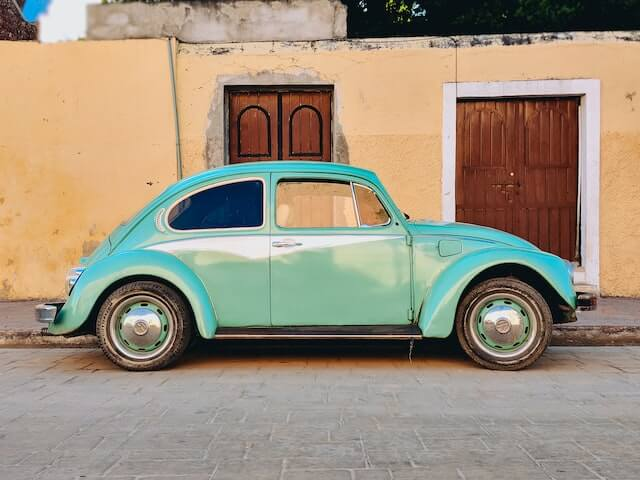

In [12]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)
image

In [11]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 16.9MB/s]


In [13]:
embeddings = model.embed(image)
print(embeddings[0].shape)


torch.Size([256])


In [14]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
    

In [20]:
print(model.model.model[16])

C3k2(
  (cv1): Conv(
    (conv): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
    (act): SiLU(inplace=True)
  )
  (cv2): Conv(
    (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1))
    (act): SiLU(inplace=True)
  )
  (m): ModuleList(
    (0): Bottleneck(
      (cv1): Conv(
        (conv): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
    )
  )
)


In [69]:
global modified_output_from_hook

def hook_function(module, input, output):
  for item in input:
    print("Input shape:", item.shape)
  print("C3k2 Mid 19 output shape:", output.shape)
  modified_output_from_hook = output
  return output

c3k2_module = model.model.model[19]
hook_handle = c3k2_module.register_forward_hook(hook_function)

In [39]:
hook_handle.remove()

In [70]:
output = model(image)


Input shape: torch.Size([1, 192, 30, 40])
C3k2 Mid 19 output shape: torch.Size([1, 128, 30, 40])


In [22]:
output = model(image)


Input shape: torch.Size([1, 256, 60, 80])
C3k2 TOP 16 output shape: torch.Size([1, 64, 60, 80])


In [34]:
output = model(image)


Input shape: torch.Size([1, 192, 30, 40])
C3k2 Mid 19 output shape: torch.Size([1, 128, 30, 40])


In [37]:
output = model(image)


Input shape: torch.Size([1, 384, 15, 20])
C3k2 Botm 22 output shape: torch.Size([1, 256, 15, 20])


In [67]:
wiring = wirings.NCP(
        inter_neurons=18,  # Number of inter neurons
        command_neurons=12,  # Number of command neurons
        motor_neurons=4,  # Number of motor neurons
        sensory_fanout=6,  # How many outgoing synapses has each sensory neuron
        inter_fanout=4,  # How many outgoing synapses has each inter neuron
        recurrent_command_synapses=4,  # Now many recurrent synapses are in the
        # command neuron layer
        motor_fanin=6,  # How many incoming syanpses has each motor neuron,
        seed=DEFAULT_NCP_SEED,  # random seed to generate connections between nodes
    )

In [42]:
dummy_input = torch.randn(1, 128, 30, 40)
print(dummy_input.shape)
flattened_input = dummy_input.view(dummy_input.size(0), -1)
print(flattened_input.shape)

torch.Size([1, 128, 30, 40])
torch.Size([1, 153600])


In [71]:
flattened_output = torch.flatten(dummy_input)
flattened_output.shape, flattened_output.size(0)

(torch.Size([153600]), 153600)

In [72]:
wiring.set_input_dim(flattened_output.size(0))
wiring.build(flattened_output.size(0))
rnn_cell  = ncps.torch.LTCCell(wiring = wiring).to(DEVICE)

In [80]:
hidden_size = rnn_cell.state_size
initial_state = torch.zeros(dummy_input.shape[0], hidden_size)
initial_state.shape, initial_state

(torch.Size([1, 34]),
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [82]:
motor_output, next_state = rnn_cell(flattened_input, initial_state)

In [102]:
class DroneControlSystem(nn.Module):
    def __init__(self, base_model = None, input_size = 153600, seed = 22222, DEVICE = DEVICE):
        super(DroneControlSystem, self).__init__()
        self.DEVICE = DEVICE
        self.model = base_model

        self.modified_output_from_hook = None

        self.wiring = wirings.NCP(
            inter_neurons=18,
            command_neurons=12,
            motor_neurons=4,
            sensory_fanout=6,
            inter_fanout=4,
            recurrent_command_synapses=4,
            motor_fanin=6,
            seed=seed,
        )

        self.c3k2_module = self.model.model.model[19]
        self.hook_handle = self.c3k2_module.register_forward_hook(self.hook_function)

        self.wiring.set_input_dim(input_size)
        self.wiring.build(input_size)
        self.rnn_cell = ncps.torch.LTCCell(wiring=self.wiring).to(self.DEVICE)

        self.current_state =  torch.zeros(1, self.rnn_cell.state_size).to(self.DEVICE)

    def forward(self, image, new_sequence = False):

      if new_sequence:
          self.current_state = torch.zeros(1, self.rnn_cell.state_size).to(self.DEVICE)

      start = time.time()
      model_output = self.model(image)
      end = time.time()
      print(f"Time taken for image encoding : {end - start} seconds")

      start = time.time()
      flattened_output = self.modified_output_from_hook.view(self.modified_output_from_hook.shape[0], -1).clone()
      motor_output, next_state = self.rnn_cell(flattened_output, self.current_state)
      self.current_state = next_state
      end = time.time()

      print(f"Time taken for Liquid network: {end - start} seconds")
      return {"motor_output" : motor_output, "next_state" : next_state, "visual_embed" : self.modified_output_from_hook}

    # Hook function to capture the output of C3k2 Mid
    def hook_function(self, module, input, output):
        print("C3k2 Mid 19 output shape:", output.shape)
        self.modified_output_from_hook = output  # Store the output from the hook
        return output

    # Mind do not use this function NEVER in good sence
    def remove_hook(self):
        self.hook_handle.remove()

In [103]:
yolo = YOLO("yolo11n.pt")
yolo_model_lnn = DroneControlSystem(base_model = yolo, DEVICE = DEVICE)

In [104]:
outputyolo = yolo_model_lnn(image)


C3k2 Mid 19 output shape: torch.Size([1, 128, 30, 40])
0: 480x640 1 car, 231.3ms
Speed: 2.1ms preprocess, 231.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Time taken for image encoding : 0.3477010726928711 seconds
Time taken for Liquid network: 0.2838163375854492 seconds


In [94]:
outputyolo

{'motor_output': tensor([[ 0.2157,  0.5791, -0.0183, -0.4720]]),
 'next_state': tensor([[ 0.2157,  0.5791, -0.0183, -0.4720,  0.0895,  0.3380,  0.2115,  0.0562,  0.0216, -0.0628, -0.0196, -0.2651, -0.0215,  0.0894,  0.1428,  0.2591,  0.0043, -0.0087, -0.0008,  0.0134,  0.0051,  0.0010,  0.0023,  0.0079, -0.0120,  0.0118,  0.0017,  0.0111, -0.0094,  0.0007,  0.0110,  0.0021, -0.0029,  0.0104]]),
 'visual_embed': tensor([[[[ 1.1850e+00,  2.3115e+00, -1.6638e-01,  ..., -2.3116e-01, -1.4833e-01,  7.9783e-01],
           [ 9.8991e-01,  1.5696e-02, -2.7834e-01,  ..., -2.0698e-01, -1.6869e-01,  7.1764e-01],
           [ 8.8991e-01, -1.7843e-01, -2.6717e-02,  ..., -1.7680e-01, -4.8095e-02,  6.1087e-01],
           ...,
           [ 5.6101e-01, -2.7726e-01, -2.7077e-01,  ..., -2.4281e-01, -1.9607e-01,  5.9736e-01],
           [ 3.9723e-01, -2.7740e-01, -2.7812e-01,  ..., -2.0077e-01, -2.4712e-01,  4.1435e-01],
           [ 7.3205e-01, -2.7518e-01, -2.2733e-01,  ..., -1.1027e-01, -7.2304e-02,  5

# **Modal**

In [ ]:
# Example: Access the hidden state of the 3rd layer (index 2, because it's 0-indexed)
layer_3_hidden_state = encoder_hidden_states[2]
print(f"Layer 3 hidden state shape: {layer_3_hidden_state.shape}")

Florence2Encoder(
  (embed_tokens): Florence2ScaledWordEmbedding(51289, 768, padding_idx=1)
  (embed_positions): Florence2LearnedPositionalEmbedding(1026, 768)
  (layers): ModuleList(
    (0-5): 6 x Florence2EncoderLayer(
      (self_attn): Florence2SdpaAttention(
        (k_proj): Linear(in_features=768, out_features=768, bias=True)
        (v_proj): Linear(in_features=768, out_features=768, bias=True)
        (q_proj): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
      )
      (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (activation_fn): GELUActivation()
      (fc1): Linear(in_features=768, out_features=3072, bias=True)
      (fc2): Linear(in_features=3072, out_features=768, bias=True)
      (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
  )
  (layernorm_embedding): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

## define the prediction function

In [ ]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to('cuda', torch.float16)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

## init image

## Run pre-defined tasks without additional inputs

### Caption

In [ ]:
task_prompt = '<CAPTION>'
run_example(task_prompt)

{'<CAPTION>': 'A green car parked in front of a yellow building.'}

In [ ]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt)

{'<DETAILED_CAPTION>': 'The image shows a blue Volkswagen Beetle parked in front of a yellow building with two brown doors, surrounded by trees and a clear blue sky.'}

In [ ]:
task_prompt = '<MORE_DETAILED_CAPTION>'
run_example(task_prompt)

{'<MORE_DETAILED_CAPTION>': 'The image shows a vintage Volkswagen Beetle car parked on a cobblestone street in front of a yellow building with two wooden doors. The car is painted in a bright turquoise color and has a sleek, streamlined design. It has two doors on either side of the car, one on top of the other, and a small window on the front. The building appears to be old and dilapidated, with peeling paint and crumbling walls. The sky is blue and there are trees in the background.'}

### Object detection

OD results format:
{'\<OD>':
    {
    'bboxes': [[x1, y1, x2, y2], ...],
    'labels': ['label1', 'label2', ...]
    }
}

In [ ]:
task_prompt = '<OD>'
results = run_example(task_prompt)
print(results)

{'<OD>': {'bboxes': [[33.599998474121094, 159.59999084472656, 596.7999877929688, 371.7599792480469], [454.0799865722656, 96.23999786376953, 580.7999877929688, 261.8399963378906], [224.95999145507812, 86.15999603271484, 333.7599792480469, 164.39999389648438], [449.5999755859375, 276.239990234375, 554.5599975585938, 370.3199768066406], [91.19999694824219, 280.0799865722656, 198.0800018310547, 370.3199768066406]], 'labels': ['car', 'door', 'door', 'wheel', 'wheel']}}


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

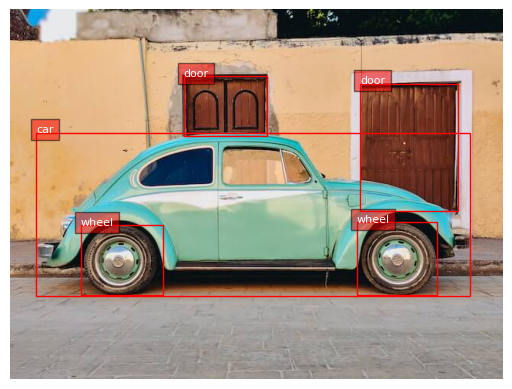

In [ ]:
plot_bbox(image, results['<OD>'])

### Dense region caption

Dense region caption results format:
{'\<DENSE_REGION_CAPTION>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['label1', 'label2', ...]}}

In [ ]:
task_prompt = '<DENSE_REGION_CAPTION>'
results = run_example(task_prompt)
print(results)

{'<DENSE_REGION_CAPTION>': {'bboxes': [[33.599998474121094, 159.59999084472656, 596.7999877929688, 371.7599792480469], [454.0799865722656, 96.72000122070312, 580.1599731445312, 261.8399963378906], [449.5999755859375, 276.239990234375, 554.5599975585938, 370.79998779296875], [91.83999633789062, 280.0799865722656, 198.0800018310547, 370.79998779296875], [224.95999145507812, 86.15999603271484, 333.7599792480469, 164.39999389648438]], 'labels': ['turquoise Volkswagen Beetle', 'wooden double doors with metal handles', 'wheel', 'wheel', 'door']}}


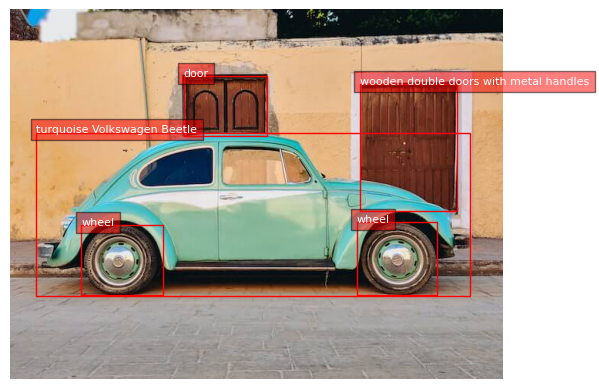

In [ ]:
plot_bbox(image, results['<DENSE_REGION_CAPTION>'])

### Region proposal

Region proposal results format:
{'<REGION_PROPOSAL>' : {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [ ]:
task_prompt = '<REGION_PROPOSAL>'
results = run_example(task_prompt)
print(results)

{'<REGION_PROPOSAL>': {'bboxes': [[33.599998474121094, 159.59999084472656, 596.7999877929688, 371.7599792480469], [454.0799865722656, 96.23999786376953, 580.7999877929688, 261.8399963378906], [449.5999755859375, 276.239990234375, 554.5599975585938, 370.3199768066406], [91.19999694824219, 280.0799865722656, 198.0800018310547, 370.3199768066406], [224.3199920654297, 85.19999694824219, 333.7599792480469, 164.39999389648438], [274.239990234375, 178.8000030517578, 392.0, 228.239990234375], [165.44000244140625, 178.8000030517578, 264.6399841308594, 230.63999938964844]], 'labels': ['', '', '', '', '', '', '']}}


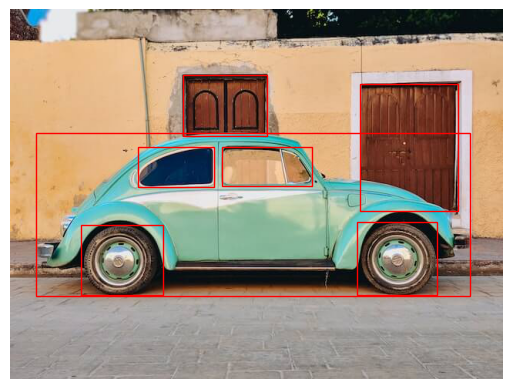

In [ ]:
plot_bbox(image, results['<REGION_PROPOSAL>'])

## Run pre-defined tasks that requires additional inputs

### Phrase Grounding
Phrase grounding results format:
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [ ]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="A green car parked in front of a yellow building.")
print(results)

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### Referring expression segmentation

Referring expression segmentation results format:
{'\<REFERRING_EXPRESSION_SEGMENTATION>': {'Polygons': [[[polygon]], ...], 'labels': ['', '', ...]}}, one object is represented by a list of polygons. each polygon is [x1, y1, x2, y2, ..., xn, yn]

In [ ]:
task_prompt = '<REFERRING_EXPRESSION_SEGMENTATION>'
results = run_example(task_prompt, text_input="a green car")
print(results)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
def draw_polygons(image, prediction, fill_mask=False):
    """
    Draws segmentation masks with polygons on an image.

    Parameters:
    - image_path: Path to the image file.
    - prediction: Dictionary containing 'polygons' and 'labels' keys.
                  'polygons' is a list of lists, each containing vertices of a polygon.
                  'labels' is a list of labels corresponding to each polygon.
    - fill_mask: Boolean indicating whether to fill the polygons with color.
    """
    # Load the image

    draw = ImageDraw.Draw(image)


    # Set up scale factor if needed (use 1 if not scaling)
    scale = 1

    # Iterate over polygons and labels
    for polygons, label in zip(prediction['polygons'], prediction['labels']):
        color = random.choice(colormap)
        fill_color = random.choice(colormap) if fill_mask else None

        for _polygon in polygons:
            _polygon = np.array(_polygon).reshape(-1, 2)
            if len(_polygon) < 3:
                print('Invalid polygon:', _polygon)
                continue

            _polygon = (_polygon * scale).reshape(-1).tolist()

            # Draw the polygon
            if fill_mask:
                draw.polygon(_polygon, outline=color, fill=fill_color)
            else:
                draw.polygon(_polygon, outline=color)

            # Draw the label text
            draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill=color)

    # Save or display the image
    #image.show()  # Display the image
    display(image)

In [ ]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REFERRING_EXPRESSION_SEGMENTATION>'], fill_mask=True)

### region to segmentation


with additional region as inputs, format is '\<loc_x1>\<loc_y1>\<loc_x2>\<loc_y2>', [x1, y1, x2, y2] is the quantized corrdinates in [0, 999].

In [ ]:
task_prompt = '<REGION_TO_SEGMENTATION>'
results = run_example(task_prompt, text_input="<loc_702><loc_575><loc_866><loc_772>")
print(results)

In [ ]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REGION_TO_SEGMENTATION>'], fill_mask=True)

### Open vocabulary detection

open vocabulary detection can detect both objects and ocr texts.

results format:

{ '\<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[x1, y1, x2, y2], [x1, y1, x2, y2], ...]], 'bboxes_labels': ['label_1', 'label_2', ..],
'polygons': [[[x1, y1, x2, y2, ..., xn, yn], [x1, y1, ..., xn, yn]], ...], 'polygons_labels': ['label_1', 'label_2', ...]
}}

In [ ]:
task_prompt = '<OPEN_VOCABULARY_DETECTION>'
results = run_example(task_prompt, text_input="a green car")
print(results)

In [ ]:
def convert_to_od_format(data):
    """
    Converts a dictionary with 'bboxes' and 'bboxes_labels' into a dictionary with separate 'bboxes' and 'labels' keys.

    Parameters:
    - data: The input dictionary with 'bboxes', 'bboxes_labels', 'polygons', and 'polygons_labels' keys.

    Returns:
    - A dictionary with 'bboxes' and 'labels' keys formatted for object detection results.
    """
    # Extract bounding boxes and labels
    bboxes = data.get('bboxes', [])
    labels = data.get('bboxes_labels', [])

    # Construct the output format
    od_results = {
        'bboxes': bboxes,
        'labels': labels
    }

    return od_results

In [ ]:
bbox_results  = convert_to_od_format(results['<OPEN_VOCABULARY_DETECTION>'])

In [ ]:
plot_bbox(image, bbox_results)

### region to texts

In [ ]:
task_prompt = '<REGION_TO_CATEGORY>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

In [ ]:
task_prompt = '<REGION_TO_DESCRIPTION>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

## ocr related tasks

In [ ]:
url = "http://ecx.images-amazon.com/images/I/51UUzBDAMsL.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')

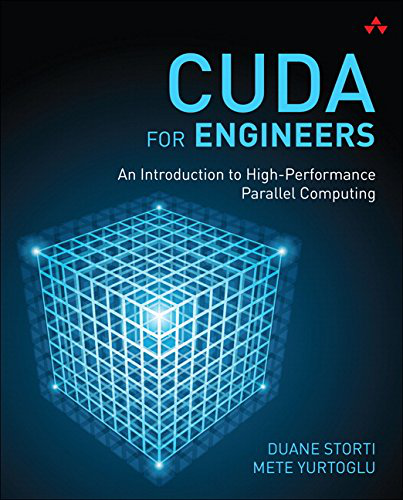

In [ ]:
image

In [ ]:
task_prompt = '<OCR>'
run_example(task_prompt)

{'<OCR>': 'CUDAFOR ENGINEERSAn Introduction to High-PerformanceParallel ComputingDUANE STORTIMETE YURTOGLU'}

In [ ]:
task_prompt = '<OCR_WITH_REGION>'
results = run_example(task_prompt)
print(results)
# ocr results format
# {'OCR_WITH_REGION': {'quad_boxes': [[x1, y1, x2, y2, x3, y3, x4, y4], ...], 'labels': ['text1', ...]}}

{'<OCR_WITH_REGION>': {'quad_boxes': [[167.0435028076172, 50.25, 376.20050048828125, 50.25, 376.20050048828125, 114.75, 167.0435028076172, 114.75], [144.8784942626953, 120.75, 375.3945007324219, 120.75, 375.3945007324219, 149.25, 144.8784942626953, 149.25], [115.86249542236328, 165.25, 376.20050048828125, 166.25, 376.20050048828125, 184.25, 115.86249542236328, 183.25], [239.9864959716797, 184.25, 376.20050048828125, 186.25, 376.20050048828125, 204.25, 239.9864959716797, 202.25], [266.1814880371094, 441.25, 376.20050048828125, 441.25, 376.20050048828125, 456.25, 266.1814880371094, 456.25], [252.0764923095703, 460.25, 376.20050048828125, 460.25, 376.20050048828125, 475.25, 252.0764923095703, 475.25]], 'labels': ['</s>CUDA', 'FOR ENGINEERS', 'An Introduction to High-Performance', 'Parallel Computing', 'DUANE STORTI', 'METE YURTOGLU']}}


In [ ]:
def draw_ocr_bboxes(image, prediction, scale=1):
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)

    display(image)

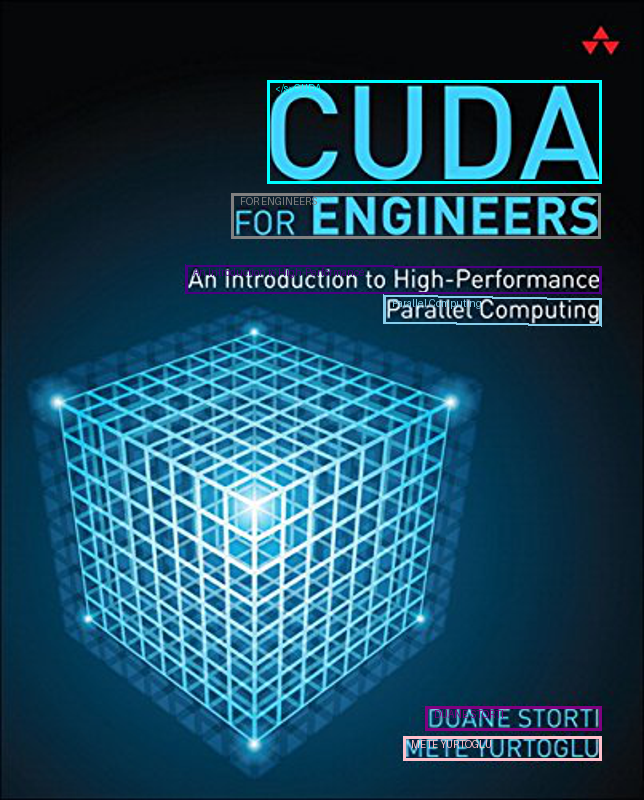

In [ ]:
output_image = copy.deepcopy(image)
w, h = output_image.size
scale = 800 / max(w, h)
new_output_image = output_image.resize((int(w * scale), int(h * scale)))
draw_ocr_bboxes(new_output_image, results['<OCR_WITH_REGION>'], scale=scale)

## Cascaded tasks

### Caption + Phrase Grounding

results format:

{
 '\<CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [ ]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
task_prompt = '<CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<CAPTION>'] = text_input

In [ ]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[34.23999786376953,
    159.1199951171875,
    582.0800170898438,
    374.6399841308594],
   [1.5999999046325684,
    4.079999923706055,
    639.0399780273438,
    305.03997802734375]],
  'labels': ['A green car', 'a yellow building']},
 '<CAPTION>': 'A green car parked in front of a yellow building.'}

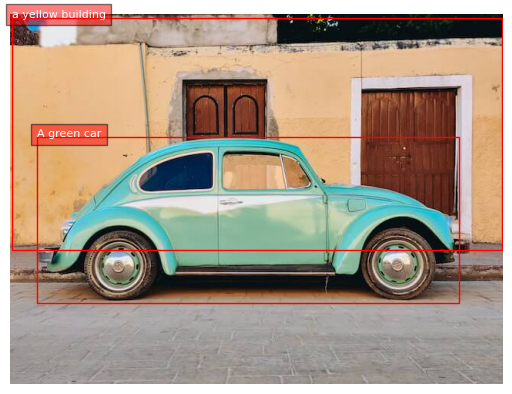

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### Detailed Caption + Phrase Grounding

results format:

{
 '\<DETAILED_CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [ ]:
task_prompt = '<DETAILED_CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<DETAILED_CAPTION>'] = text_input

In [ ]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[33.599998474121094,
    158.63999938964844,
    582.719970703125,
    375.1199951171875],
   [1.5999999046325684, 5.039999961853027, 639.0399780273438, 306.0],
   [452.79998779296875,
    94.31999969482422,
    582.0800170898438,
    265.67999267578125],
   [222.39999389648438,
    84.23999786376953,
    335.03997802734375,
    167.27999877929688],
   [2.240000009536743,
    1.1999999284744263,
    639.0399780273438,
    43.91999816894531],
   [343.3599853515625,
    1.1999999284744263,
    639.0399780273438,
    40.55999755859375],
   [2.240000009536743,
    1.1999999284744263,
    638.3999633789062,
    43.91999816894531],
   [18.239999771118164,
    1.1999999284744263,
    104.63999938964844,
    45.36000061035156]],
  'labels': ['a blue Volkswagen Beetle',
   'a yellow building',
   'brown doors',
   'brown doors',
   'trees',
   'trees',
   'a clear blue sky',
   'a clear blue sky']},
 '<DETAILED_CAPTION>': 'The image shows a blue Vol

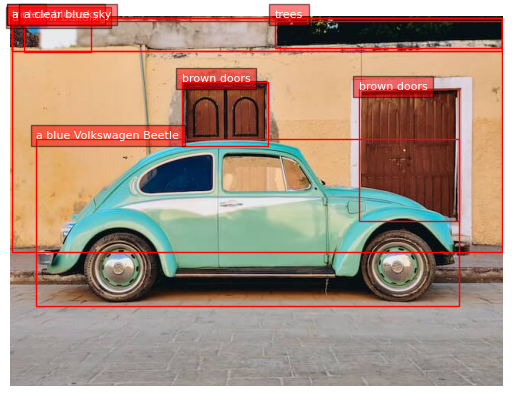

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### More Detailed Caption + Phrase Grounding

results format:

{
 '\<MORE_DETAILED_CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [ ]:
task_prompt = '<MORE_DETAILED_CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<MORE_DETAILED_CAPTION>'] = text_input

In [ ]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[35.52000045776367,
    157.67999267578125,
    581.4400024414062,
    372.7200012207031],
   [1.5999999046325684,
    340.0799865722656,
    639.0399780273438,
    479.2799987792969],
   [454.0799865722656,
    93.83999633789062,
    580.7999877929688,
    263.2799987792969],
   [223.67999267578125,
    84.23999786376953,
    333.7599792480469,
    163.9199981689453],
   [36.79999923706055,
    157.67999267578125,
    580.1599731445312,
    372.239990234375],
   [454.0799865722656,
    93.83999633789062,
    581.4400024414062,
    263.2799987792969],
   [223.67999267578125,
    84.72000122070312,
    333.7599792480469,
    163.9199981689453],
   [164.16000366210938,
    177.36000061035156,
    265.2799987792969,
    232.0800018310547],
   [2.879999876022339,
    4.559999942779541,
    639.0399780273438,
    301.1999816894531],
   [19.520000457763672, 1.1999999284744263, 639.0399780273438, 42.0],
   [20.15999984741211,
    0.719999969005584

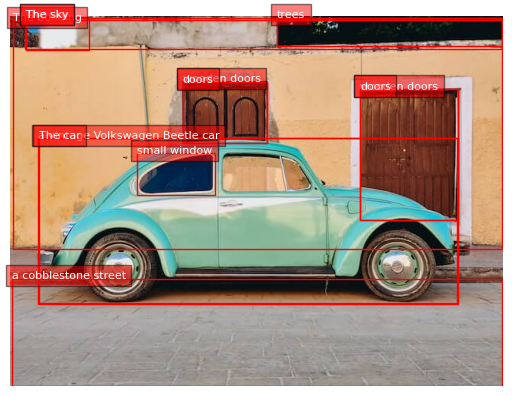

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])